<a href="https://colab.research.google.com/github/usshaa/Deep-Learning-For-all/blob/main/Module_4_Convolutional_Neural_Networks_(CNNs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📌 Module 4: Convolutional Neural Networks (CNNs)**  

### 🎯 **Learning Objectives**  
- Understand **Basics of Image Processing**  
- Learn **Convolution Operation & Filters**  
- Explore **Pooling Layers (Max Pooling, Average Pooling)**  
- Study **Popular CNN Architectures (LeNet, AlexNet, VGG, ResNet, EfficientNet)**  
- Implement **Transfer Learning & Pretrained Models**  
- Apply **Data Augmentation** to improve model performance  

---

## **🔹 1. Basics of Image Processing**  
In CNNs, images are represented as **3D tensors** (Height × Width × Channels).  
- **Grayscale Image**: 2D array (Height × Width)  
- **RGB Image**: 3D array (Height × Width × 3)  

✅ **Example: Load and Display an Image using OpenCV & Matplotlib**  


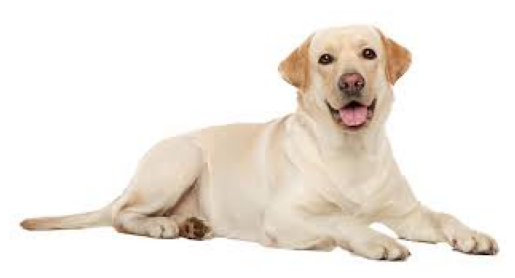

In [172]:
import cv2
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('dg.jpg')  # Read image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

## **🔹 2. Convolution Operation & Filters**  
CNNs use **convolutional layers** to extract features from images using **filters (kernels)**.  

### ✅ **Example: Applying a Convolution Filter**  


In [173]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

In [174]:
# Define a simple CNN model
model = Sequential([
    Conv2D(filters=8, kernel_size=(3,3), activation='relu', input_shape=(28,28,1))
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [175]:
# Show model summary
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 8)           │              80 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80 (320.00 B)

 Trainable params: 80 (320.00 B)

 Non-trainable params: 0 (0.00 B)

✅ **Explanation:**  
- The **Conv2D layer** applies 8 filters of size **3×3** to the input.  
- The **ReLU activation function** introduces non-linearity.  

---

## **🔹 3. Pooling Layers (Max Pooling, Average Pooling)**  
Pooling layers **reduce spatial dimensions** while retaining important features.  

| Pooling Type | Function |
|-------------|----------|
| **Max Pooling** | Selects the maximum value in the region |
| **Average Pooling** | Computes the average value in the region |

✅ **Example: Adding Max Pooling to a CNN**  


In [176]:
from tensorflow.keras.layers import MaxPooling2D

model = Sequential([
    Conv2D(8, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),  # Max Pooling Layer
])
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 8)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80 (320.00 B)

 Trainable params: 80 (320.00 B)

 Non-trainable params: 0 (0.00 B)

## **🔹 4. CNN Architectures (LeNet, AlexNet, VGG, ResNet, EfficientNet)**  
Several CNN architectures have been developed to solve complex image tasks.

| Architecture | Year | Key Features |
|-------------|------|--------------|
| **LeNet-5** | 1998 | First CNN, used for digit recognition |
| **AlexNet** | 2012 | First deep CNN for ImageNet, ReLU activation |
| **VGG** | 2014 | Deep but simple architecture with 3×3 filters |
| **ResNet** | 2015 | Introduced **skip connections** (solves vanishing gradient) |
| **EfficientNet** | 2019 | Uses **compound scaling** for efficiency |

✅ **Example: Load Pretrained VGG16 Model**  


In [177]:
from tensorflow.keras.applications import VGG16

In [178]:
# Load VGG16 model
model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

✅ **Explanation:**  
- `weights='imagenet'` → Uses pretrained ImageNet weights  
- `include_top=False` → Removes final classification layer  

---

## **🔹 5. Transfer Learning & Pretrained Models**  
Instead of training from scratch, we can use **pretrained CNNs** for faster training.

✅ **Example: Transfer Learning with ResNet50**  


In [179]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

In [180]:
# Load Pretrained ResNet50 Model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [181]:
# Add Custom Layers
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

In [182]:
# Create New Model
model = Model(inputs=base_model.input, outputs=x)

In [183]:
# Freeze Pretrained Layers
for layer in base_model.layers:
    layer.trainable = False

In [184]:
# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [185]:
# Show Model Summary
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 36,434,186 (138.99 MB)

 Trainable params: 12,846,474 (49.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

✅ **Explanation:**  
- Uses **ResNet50** as the feature extractor  
- Adds custom **Dense layers** for classification  
- Freezes pretrained layers to **retain learned features**  

---

## **🔹 6. Data Augmentation**  
Data Augmentation artificially **increases dataset size** by applying transformations.

✅ **Common Augmentations**
| Transformation | Effect |
|---------------|--------|
| **Rotation** | Rotates image randomly |
| **Flipping** | Flips image horizontally or vertically |
| **Zooming** | Zooms into the image |
| **Shearing** | Applies a shear transformation |

✅ **Example: Applying Data Augmentation in Keras**  


In [193]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [194]:
# Define Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,  # Rotate images by 20 degrees
    width_shift_range=0.2,  # Shift width
    height_shift_range=0.2,  # Shift height
    horizontal_flip=True,  # Flip horizontally
    zoom_range=0.2  # Random zoom
)

In [207]:
# Apply to an image batch
augmented_images = datagen.flow_from_directory('/content/animal_dataset', target_size=(224,224))

Found 30 images belonging to 6 classes.


✅ **Explanation:**  
- **Creates new variations** of images to improve generalization.  
- **Reduces overfitting** in small datasets.  

---

# **📊 Summary**
| Topic | Key Takeaways |
|-------|--------------|
| **Image Processing** | Images are tensors (Grayscale: 2D, RGB: 3D) |
| **Convolution** | Extracts features using filters (kernels) |
| **Pooling Layers** | Max pooling reduces dimensions while keeping key features |
| **CNN Architectures** | LeNet, AlexNet, VGG, ResNet, EfficientNet |
| **Transfer Learning** | Uses pretrained models (VGG, ResNet) |
| **Data Augmentation** | Increases dataset diversity with transformations |

---

In [202]:
!mkdir -p /content/drive/MyDrive/animal_dataset


In [204]:
!cp -r "/content/drive/MyDrive/animal_dataset" "/content/animal_dataset"